In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()


In [3]:
x=data.data

In [4]:
df = pd.DataFrame(x, columns=data.feature_names)
df['Target'] = data.target 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [6]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [7]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [8]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20640, dtype: bool

In [10]:
df.duplicated().sum()

0

<Axes: >

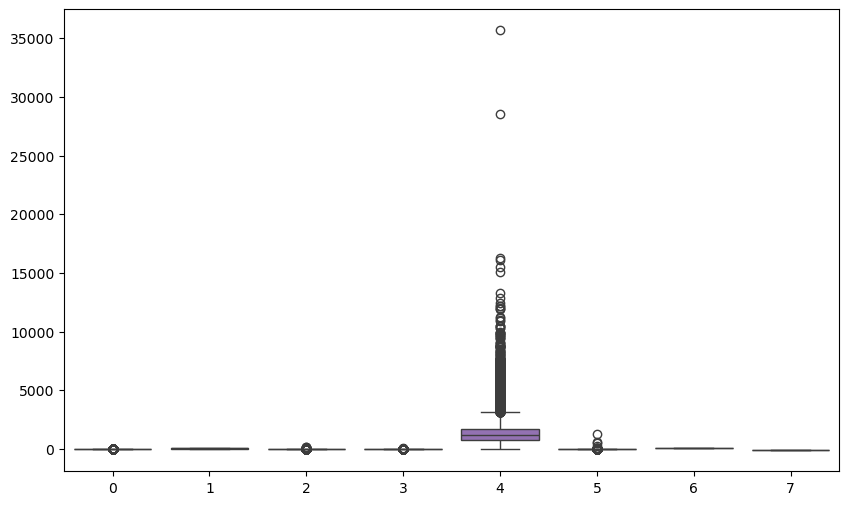

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x)

<Axes: ylabel='Population'>

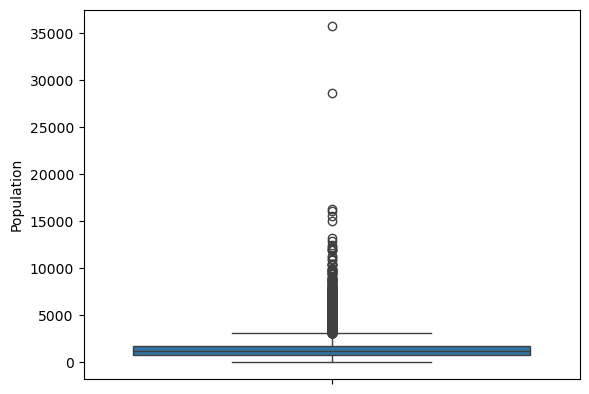

In [12]:
sns.boxplot(df['Population'])

In [13]:
num_columns=df.select_dtypes(include='number')

In [14]:
num_columns

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

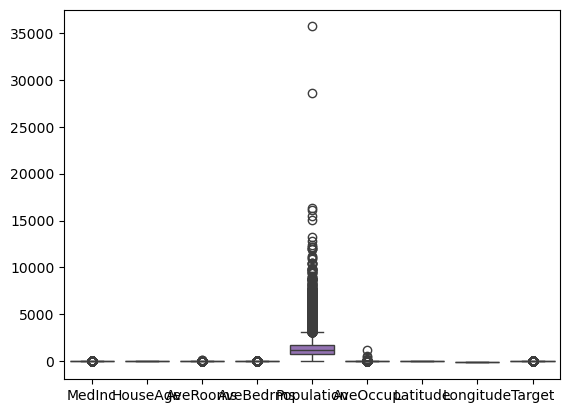

In [15]:
sns.boxplot(data=df)

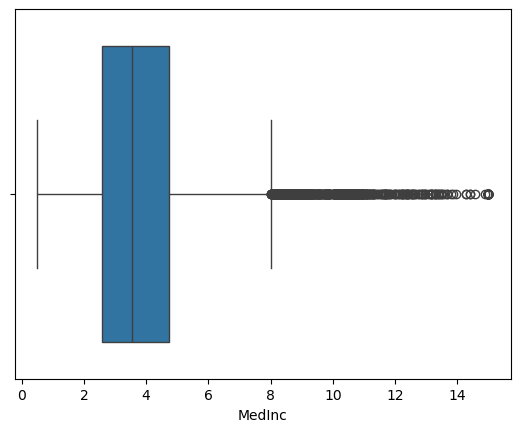

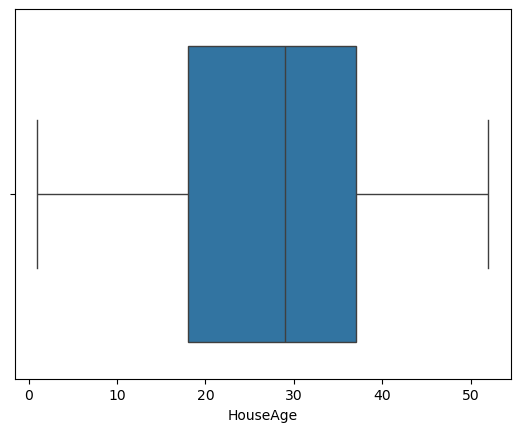

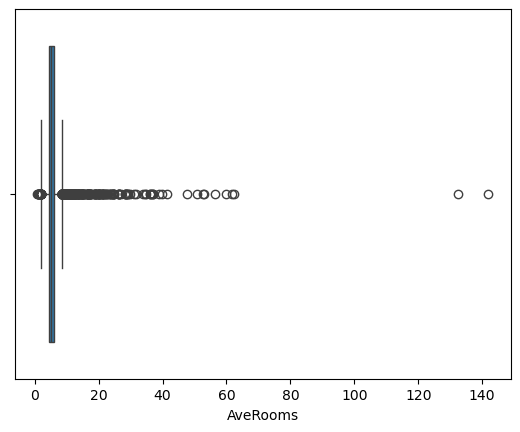

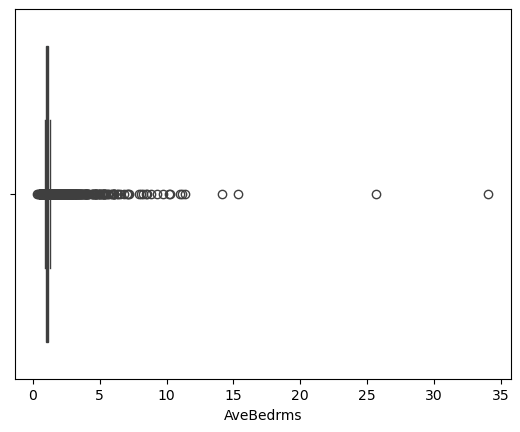

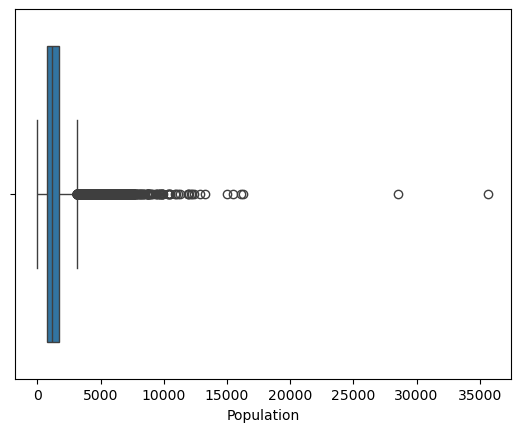

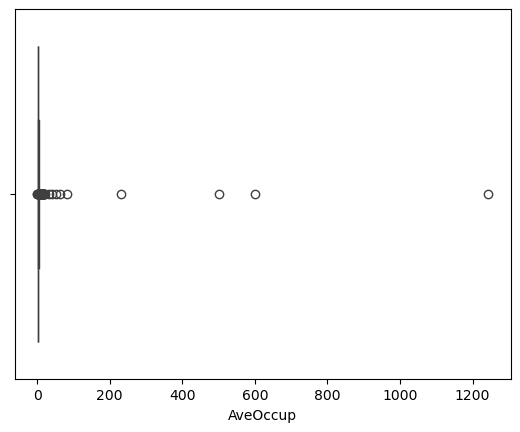

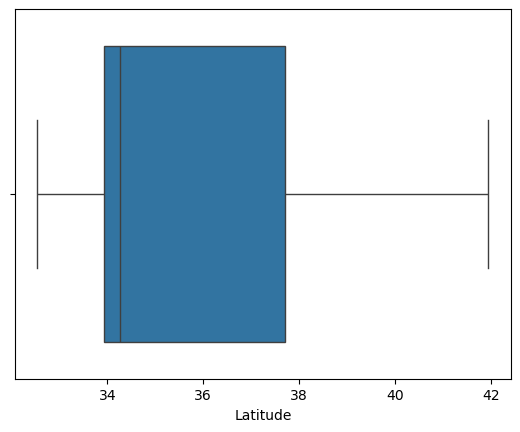

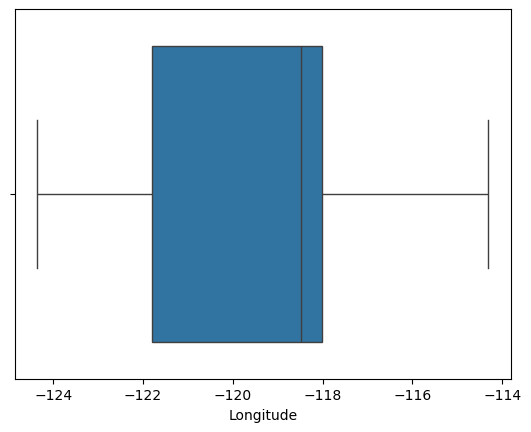

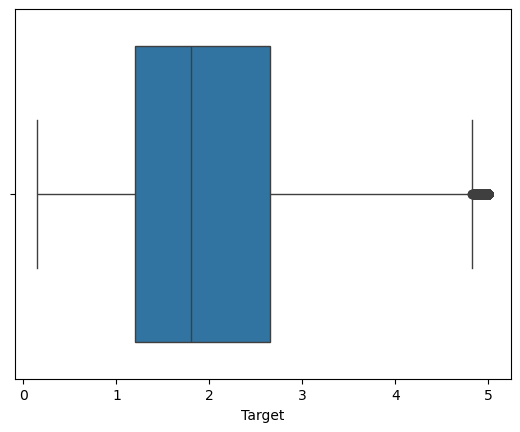

In [16]:
for i in num_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [17]:
# IQR Method
def outliers(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [18]:
df1=outliers(df)

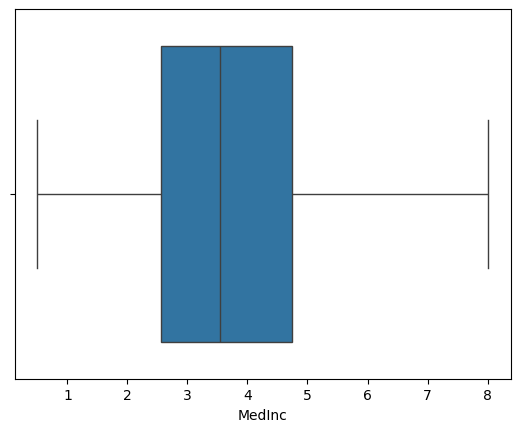

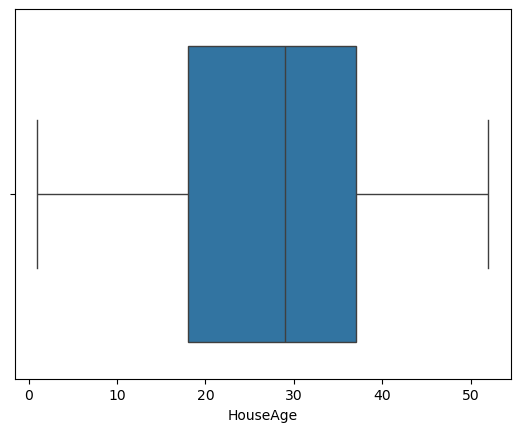

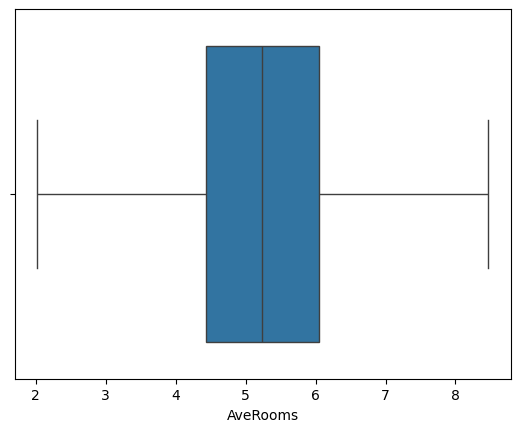

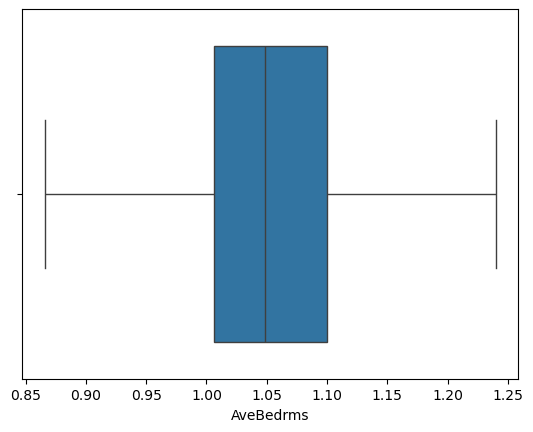

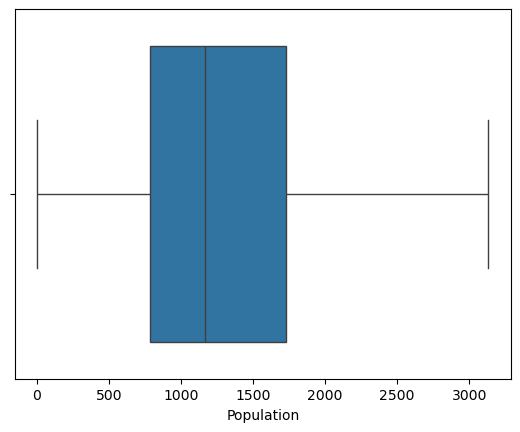

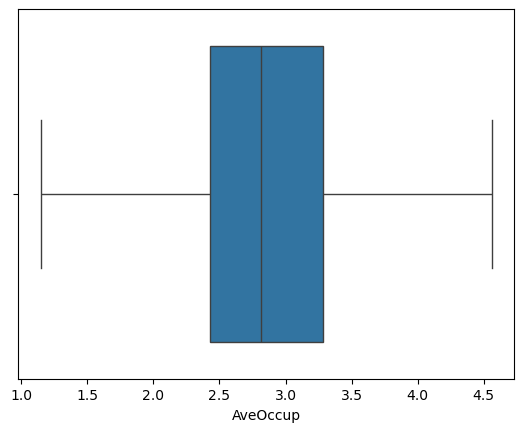

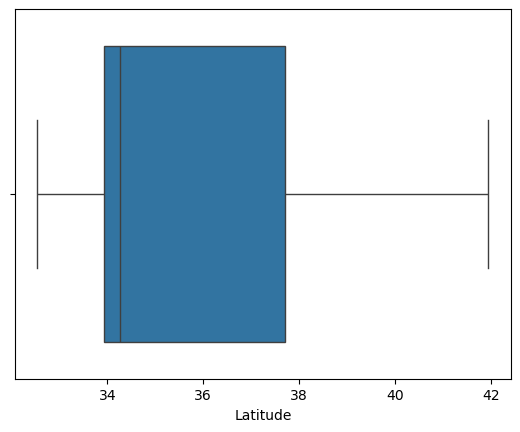

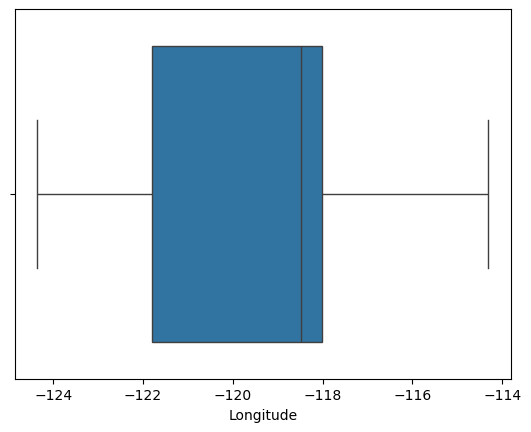

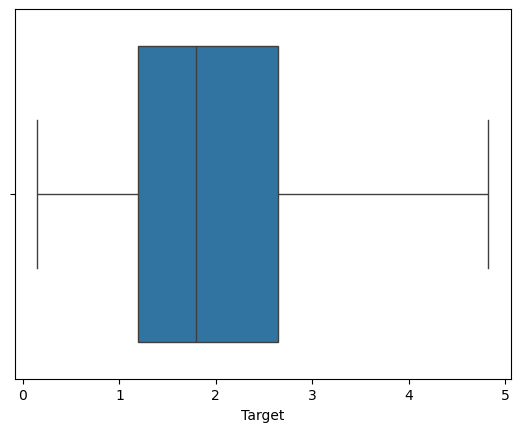

In [19]:
for i in num_columns.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [20]:
# Skew
df1.skew()

MedInc        0.735618
HouseAge      0.060331
AveRooms      0.348567
AveBedrms     0.462645
Population    0.842247
AveOccup      0.510453
Latitude      0.465953
Longitude    -0.297801
Target        0.912330
dtype: float64

In [21]:
from sklearn.preprocessing import PowerTransformer

In [22]:
pt=PowerTransformer(method='yeo-johnson')

In [23]:
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns

In [24]:
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

In [25]:
df1[numerical_features].skew()

MedInc       -0.002164
HouseAge     -0.113089
AveRooms      0.002958
AveBedrms    -0.003923
Population    0.008781
AveOccup      0.000402
Latitude      0.153850
Longitude     0.000000
Target        0.026767
dtype: float64

In [26]:
df2=df1[numerical_features]

In [27]:
# Correlation
corr=df2.corr()

In [28]:
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.149647,0.637936,-0.231318,0.025523,-0.052207,-0.071366,-0.016506,0.682156
HouseAge,-0.149647,1.000000,-0.228693,-0.133337,-0.277908,-0.010820,0.024328,-0.107547,0.077501
AveRooms,0.637936,-0.228693,1.000000,0.155783,-0.101018,0.007493,0.129838,-0.071487,0.263888
AveBedrms,-0.231318,-0.133337,0.155783,1.000000,0.022477,-0.127550,0.047217,0.015406,-0.120227
Population,0.025523,-0.277908,-0.101018,0.022477,1.000000,0.229801,-0.133011,0.115722,0.011856
AveOccup,-0.052207,-0.010820,0.007493,-0.127550,0.229801,1.000000,-0.140537,0.163768,-0.263508
Latitude,-0.071366,0.024328,0.129838,0.047217,-0.133011,-0.140537,1.000000,-0.934695,-0.163582
Longitude,-0.016506,-0.107547,-0.071487,0.015406,0.115722,0.163768,-0.934695,1.000000,-0.030294
Target,0.682156,0.077501,0.263888,-0.120227,0.011856,-0.263508,-0.163582,-0.030294,1.000000


Text(0.5, 1.0, 'Correlation Of California Housing Data')

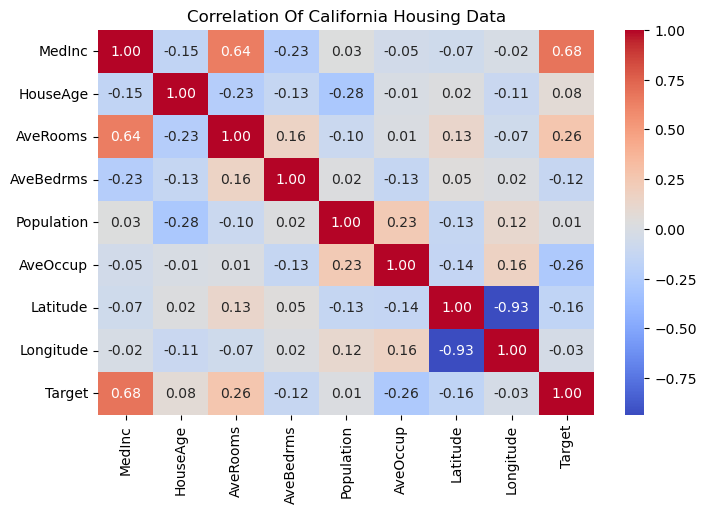

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Of California Housing Data')

In [30]:
from sklearn.feature_selection import SelectKBest,f_classif

In [31]:
x=df2
y=df['Target']

In [32]:
sk=SelectKBest(score_func=f_classif,k=3)
x_new=sk.fit_transform(x,y)

In [33]:
# Get selected feature names and scores
selected_features = x.columns[sk.get_support()]
feature_scores = pd.DataFrame({'Feature': x.columns, 'Score': sk.scores_}).sort_values(by='Score', ascending=False)

print("Selected Features:", selected_features)
print("\nFeature Scores:")
print(feature_scores)

Selected Features: Index(['MedInc', 'AveRooms', 'AveOccup'], dtype='object')

Feature Scores:
      Feature         Score
0      MedInc  6.723031e+00
2    AveRooms  1.919191e+00
5    AveOccup  1.445941e+00
4  Population  1.381565e+00
6    Latitude  1.235423e+00
1    HouseAge  1.107385e+00
3   AveBedrms  1.074943e+00
7   Longitude  1.051967e+00
8      Target -1.406690e+15


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler=StandardScaler()

In [36]:
xscaled=scaler.fit_transform(data.data)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.2,random_state=42)

In [39]:
# Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
# LinearRegression
model1= LinearRegression()

In [42]:
model1.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred1=model1.predict(x_test)

In [44]:
# Model Evaluvasion MAe,MSE,RMSE,R2score

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [46]:
mae = mean_absolute_error(y_test,y_pred1)
mae

0.4770896919107779

In [47]:
mse = mean_squared_error(y_test,y_pred1)
mse

0.3998998976163697

In [48]:
rmse = np.sqrt( mean_squared_error(y_test,y_pred1))
rmse

0.6323763891990036

In [49]:
r2 = r2_score(y_test,y_pred1)
r2

0.5991436378470536

In [50]:
from sklearn.svm import SVR

In [51]:
# SVR
model2 = SVR()

In [52]:
model2.fit(x_train,y_train)

SVR()

In [53]:
y_pred2=model2.predict(x_test)

In [54]:
mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt( mean_squared_error(y_test,y_pred2))
r2 = r2_score(y_test,y_pred2)

In [55]:
print (f'mae:{mae}')
print (f'mse:{mse}')
print (f'rmse:{rmse}')
print (f'r2:{r2}')

mae:0.34900648789146865
mse:0.2273839612619294
rmse:0.47684794354377724
r2:0.7720721908990746


In [56]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [57]:
# RandomForestRegressor
model3 = RandomForestRegressor()

In [58]:
model3.fit(x_train,y_train)

RandomForestRegressor()

In [59]:
y_pred3= model3.predict(x_test)

In [60]:
mae = mean_absolute_error(y_test,y_pred3)
mse = mean_squared_error(y_test,y_pred3)
rmse = np.sqrt( mean_squared_error(y_test,y_pred3))
r2 = r2_score(y_test,y_pred3)
print (f'mae:{mae}')
print (f'mse:{mse}')
print (f'rmse:{rmse}')
print (f'r2:{r2}')

mae:0.2842273536617698
mse:0.1700203780518038
rmse:0.41233527383890384
r2:0.8295729740268758


In [61]:
# GradientBoostingRegressor
model4 = GradientBoostingRegressor()

In [62]:
model4.fit(x_train,y_train)

GradientBoostingRegressor()

In [63]:
y_pred4=model4.predict(x_test)

In [64]:
mae = mean_absolute_error(y_test,y_pred4)
mse = mean_squared_error(y_test,y_pred4)
rmse = np.sqrt( mean_squared_error(y_test,y_pred4))
r2 = r2_score(y_test,y_pred4)
print (f'mae:{mae}')
print (f'mse:{mse}')
print (f'rmse:{rmse}')
print (f'r2:{r2}')

mae:0.3290259734967672
mse:0.20400499945067876
rmse:0.45166912607646625
r2:0.7955070695735396


In [65]:
# DecisionTreeRegressor
# AdaBoostRegressor
# MlpRegressor

In [66]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
# DecisionTreeRegressor
model5 = DecisionTreeRegressor()

In [68]:
model5.fit(x_train,y_train)

DecisionTreeRegressor()

In [69]:
y_pred5=model5.predict(x_test)

In [70]:
mae = mean_absolute_error(y_test,y_pred5)
mse = mean_squared_error(y_test,y_pred5)
rmse = np.sqrt( mean_squared_error(y_test,y_pred5))
r2 = r2_score(y_test,y_pred5)
print (f'mae:{mae}')
print (f'mse:{mse}')
print (f'rmse:{rmse}')
print (f'r2:{r2}')

mae:0.3916532456562108
mse:0.3270973659470241
rmse:0.5719242659190324
r2:0.6721202956917991


In [71]:
from sklearn.ensemble import AdaBoostRegressor

In [72]:
# AdaBoostRegressor
model6 =  AdaBoostRegressor()

In [73]:
model6.fit(x_train,y_train)

AdaBoostRegressor()

In [74]:
y_pred6=model6.predict(x_test)

In [75]:
mae = mean_absolute_error(y_test,y_pred6)
mse = mean_squared_error(y_test,y_pred6)
rmse = np.sqrt( mean_squared_error(y_test,y_pred6))
r2 = r2_score(y_test,y_pred6)
print (f'mae:{mae}')
print (f'mse:{mse}')
print (f'rmse:{rmse}')
print (f'r2:{r2}')

mae:0.5178644070443438
mse:0.41508718058253535
rmse:0.6442725980379231
r2:0.5839200305465966


In [76]:
from sklearn.neural_network import MLPRegressor

In [77]:
# MLPRegressor
model7 = MLPRegressor()

In [78]:
model7.fit(x_train,y_train)

MLPRegressor()

In [79]:
y_pred7=model7.predict(x_test)

In [80]:
mae = mean_absolute_error(y_test,y_pred7)
mse = mean_squared_error(y_test,y_pred7)
rmse = np.sqrt( mean_squared_error(y_test,y_pred7))
r2 = r2_score(y_test,y_pred7)
print (f'mae:{mae}')
print (f'mse:{mse}')
print (f'rmse:{rmse}')
print (f'r2:{r2}')

mae:0.32376634309529384
mse:0.20158939634888673
rmse:0.4489870781535775
r2:0.7979284502179493


In [81]:
models={
    '1. Linear Regression':LinearRegression(),
    '2. Decision Tree Regressor':DecisionTreeRegressor(),
    '3. Random Forest Regressor':RandomForestRegressor(), 
    '4. Gradiant Boosting Regressor':GradientBoostingRegressor(), 
    '5. Support Vector Regressor':SVR(),
    '6. DecisionTreeRegressor':DecisionTreeRegressor(),
    '7. AdaBoostRegressor':AdaBoostRegressor(),
    '8. MLPRegressor':MLPRegressor(),
}

In [82]:
# MODEL EVALUATION
results={} # use to store evaluation result 

for model_name, model in models.items():
    # fit the model
    model.fit(x_train,y_train)  
    # make the prediction
    y_pred = model.predict(x_test)
    # Evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    # Store the results
    results[model_name] = {"MSE": mse, "MAE":mae,"RMSE":rmse,"R2": r2,}

In [83]:
result_DF=pd.DataFrame(results).T
print  (result_DF)

                                     MSE       MAE      RMSE        R2
1. Linear Regression            0.399900  0.477090  0.632376  0.599144
2. Decision Tree Regressor      0.325202  0.389844  0.570265  0.674020
3. Random Forest Regressor      0.169593  0.284762  0.411816  0.830002
4. Gradiant Boosting Regressor  0.204026  0.329066  0.451693  0.795486
5. Support Vector Regressor     0.227384  0.349006  0.476848  0.772072
6. DecisionTreeRegressor        0.328458  0.392440  0.573113  0.670756
7. AdaBoostRegressor            0.439285  0.533002  0.662786  0.559664
8. MLPRegressor                 0.203058  0.325859  0.450620  0.796456


In [84]:
best_model=max(result_DF['R2'])
best_model

0.8300018119863823

In [85]:
best_model=result_DF.sort_values(by='R2',ascending=False).iloc[0]
print("best_model",best_model)

best_model MSE     0.169593
MAE     0.284762
RMSE    0.411816
R2      0.830002
Name: 3. Random Forest Regressor, dtype: float64


In [86]:
best_model = result_DF.loc[result_DF['R2'].idxmax()]
best_model

MSE     0.169593
MAE     0.284762
RMSE    0.411816
R2      0.830002
Name: 3. Random Forest Regressor, dtype: float64

In [87]:
import joblib 

In [88]:
joblib.dump(best_model,'RFG.joblib')   

['RFG.joblib']

In [89]:
load_model=joblib.load('RFG.joblib')